# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 1 iamlans`

You can check the status of your submissions with the `show submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/spambase.csv` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [412]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [441]:
#loading train_20news_partA.csv and showing head
partA_loc = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
partA = pd.read_csv(partA_loc)
partA.head() 
 

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3


In [483]:
#loading train_20news_partB.csv and showing head
partB_loc = os.path.join(os.getcwd(), 'datasets', 'train_20news_partB.csv')
partB = pd.read_csv(partB_loc)
partB.head()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,0,0,0,0,0,0,0,0,0,0,...,0,4,2,5,7,3,5,3,7,4
1,0,0,0,0,0,0,0,0,0,0,...,1,2,5,7,2,3,4,5,4,4
2,0,0,0,0,0,0,0,0,0,1,...,3,1,5,4,1,4,4,6,7,2
3,0,0,0,0,0,0,0,0,0,0,...,5,2,5,0,0,7,0,7,3,3
4,0,0,0,0,0,0,0,0,0,0,...,5,0,6,7,5,2,0,7,3,3


### ========== Question 1.2 ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [443]:
partA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 9.0 MB


### ========== Question 1.3 ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

There are 2257 data points which each have 520 attribute-value pairs. (There are 520 attributes.)



### ========== Question 1.4  ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [444]:
partA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,...,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000
mean,4.894550,5.810368,5.829863,5.293753,5.265840,5.837838,5.370846,5.804165,5.689411,5.367302,...,9.388126,8.941515,8.808152,9.117412,8.911830,9.410722,8.574214,9.419140,9.036774,3.091715
std,37.202621,44.876796,45.328601,39.789073,39.812328,44.657020,39.976914,44.460305,43.007789,39.609623,...,44.542075,42.701889,39.807593,42.590600,41.200456,45.952422,38.224780,44.875752,43.779984,1.395918
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.000000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 ==========
Display the first 7 instances of dataset A.

In [445]:
partA.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
<h4> I wasn't clear whether to strip the `w<x>_` so I went ahead and did it </h4>
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [446]:
# Your code goes here
wordsInA = partA.columns.values.tolist()

for x in range(0, 100):
    word = wordsInA[x]
    word = word[3:len(word)]
    
    #getting rid of leading underscores
    if word[0] == ('_'):
        word = word[1:len(word)]
    
    #getting rid of leading '0' and underscore
    if word[0] == ('0'):
        word = word[2:len(word)]
    

    print (x," ", word)
 



0   aaa
1   pins
2   kmr
3   notion
4   queens
5   dwyer
6   defenseman
7   gld
8   tocchet
9   home
10   buying
11   internet
12   slots
13   compatible
14   transfer
15   baltimore
16   mean
17   person
18   performance
19   support
20   tor
21   gm
22   mouse
23   base
24   population
25   bob
26   set
27   it
28   earth
29   faith
30   steve
31   caps
32   printer
33   east
34   cable
35   adapter
36   mss
37   catcher
38   bullpen
39   obp
40   innocent
41   european
42   angeles
43   settings
44   words
45   rit
46   shots
47   ports
48   vga
49   coverage
50   jumpers
51   bases
52   sea
53   pts
54   behavior
55   domi
56   sabres
57   yzerman
58   messier
59   goalies
60   hawks
61   our
62   sx
63   view
64   hitters
65   richard
66   point
67   nyi
68   mvp
69   kill
70   nl
71   field
72   connector
73   stars
74   th
75   install
76   traded
77   configuration
78   standard
79   rotation
80   ultb
81   sports
82   pds
83   canada
84   did
85   clock
86   first
87   switch


### ========== Question 1.7 ==========
Familiarise yourself with the [`stripplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

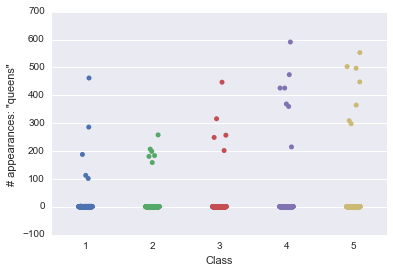

In [448]:
plot = sns.stripplot(x = partA['class'], y = partA.w5_queens, jitter=True, palette=None, size=5, alpha = 1)
plot.set_xlabel('Class')
plot.set_ylabel('# appearances: "queens" ')

### ========== Question 1.8 ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [449]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)
    

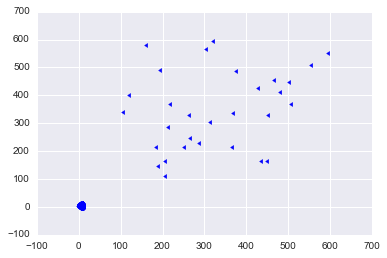

In [450]:
scatter_jitter(partA.w5_queens, partA.w515_lacks, jitter=0.05)


### ========== Question 1.9 ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

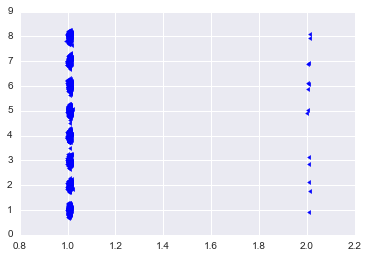

In [451]:
# Your code goes here
partA_clean = partA[(partA < 50)]
partA_clean.dropna(axis = 0, inplace = True)
scatter_jitter(partA_clean.w5_queens, partA_clean.w515_lacks, jitter=0.05)

I removed all the entries that had values greater than 50.

### ========== Question 1.10 ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [453]:
num_rows_original = partA.shape[0]
num_rows_clean = partA_clean.shape[0]
print ("Number of data points in clean set: " 
       + str(num_rows_clean) + "\nNumber of documents excluded: " + str(num_rows_original - num_rows_clean))


Number of data points in clean set: 2209
Number of documents excluded: 48


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

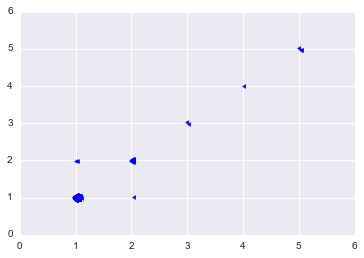

In [454]:
# Your code goes here
scatter_jitter(partA_clean.w281_ico, partA_clean.w273_tek, jitter=0.1)

### ========== Question 2.2 ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

It is easy to oberserve that the two attributes are clearly positively correlated. Yet, with the Naive bayes we assume conditional independence. This is not necessarily an issue for our NB classifier *IF* the correlation is explained by class. That is, if the two appearances of ico and tek only appear together in one class, than they could still be considered conditionally independent but if there is another outside factor that makes them typically occur together, then we could have issues with NB classification.

Assuming conditional independence is necessary because it allows us to save lots of computation because we can just compute the probability each individual attribute instead of testing every single combination of attributes. If we didn't make this assumption we would have an enormous amount of computation on our hands.

### ========== Question 2.3 ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [511]:
# Your code goes here
classifier = GaussianNB()
target = partA_clean['class']
training = partA_clean.drop('class',axis=1)
classifier.fit(training, target)

#run model on training data!
predicted = classifier.predict(training)

#print results
print("Classifier: " + str(classifier))
print("Accuracy Score: " + str(accuracy_score(target,predicted)))


Classifier: GaussianNB()
Accuracy Score: 0.877320054323


### ========== Question 2.4 ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

Confusion Matrix: 


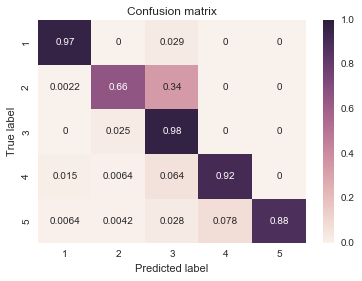

In [515]:
# Your code goes here

# summarize the fit of the model
print("Confusion Matrix: ")
matrix = sklearn.metrics.confusion_matrix(target, predicted)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
plot_confusion_matrix(matrix, classes = ['1','2','3','4','5'])

### ========== Question 2.5  ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

This matrix seems to imply that we have a relatively good fit for our training data. 

We know that classes 2-3 and 4-5 are rather closely related. This is evident in the confusion matrix, as our classifier often mispredicted 3 when the true class was 2. Our classifier had by far the highest accuracy for class 1, which makes sense because there was no class similar to 1, with which it could get confused.

Interestingly, the classifier never predicted 5 (rec.sport.hockey) and was wrong but sometimes underpredicted 5. 

### ========== Question 2.6 ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [513]:
# Your code goes here
# Your code goes here
classifier_u = GaussianNB()
target_u = partA['class']
training_u = partA.drop('class',axis=1)
classifier_u.fit(training_u, target_u)

#run model on training data!
predicted_u = classifier_u.predict(training_u)

#print results
print("Classifier: " + str(classifier_u))
print("Accuracy Score: " + str(accuracy_score(target_u,predicted_u)))

Classifier: GaussianNB()
Accuracy Score: 0.203367301728


### ========== Question 2.7 ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

The unclean data included outliers with huge values for some of the words. This greatly skews our NB calculations as the large outliers, which in this case appear to be typos or incorrect data, disproportionately negatively affect word $\mu$ values. Given the relatively small size of our dataset (~two-thousand documents), and relative frequency and ridiculously large size of the outliers (values in the hundreds), this skews the prediction algorithm enormously.


### ========== Question 2.8 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

Classifier: GaussianNB()
Accuracy Score: 0.251459362371


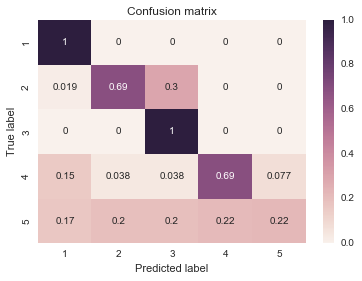

In [549]:
# Your code goes here
dataB = partB.drop('class', axis = 1)
classificationsB = partB['class']

#run model on training data!
predictedB = classifier.predict(dataB)

#print results
print("Classifier: " + str(classifier))
print("Accuracy Score: " + str(accuracy_score(classificationsB, predictedB)))

#build the matrix
matrixB = sklearn.metrics.confusion_matrix(predictedB, classificationsB)

#normalize matrix
matrixB = matrixB.astype('float') / matrixB.sum(axis = 1)[:, np.newaxis]
plot_confusion_matrix(matrixB, classes = ['1','2','3','4','5'])


### ========== Question 2.9 ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

This level of performance seems unacceptable. Class 1 is the easiest to predict, which makes sense because it is the most distinct in its characteristics. The algorithm has particular difficulty predicting class five.

### ========== Question 2.10 ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

The simplest classifier I can think of would be assigning the class with the highest prior probability to every document. However, since the classes are evenly distributed in our documents (as shown in the graph below), this would yield a no better success rate than assigning randomly. So I would assign every document a random class.

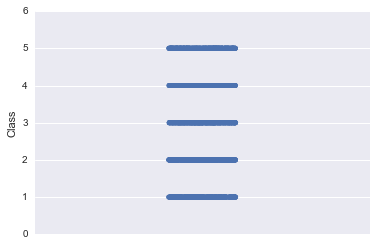

In [540]:
plot = sns.stripplot(y = partA['class'], jitter=1, palette=None, size=5, alpha = 1)
plot.set_ylabel('Class')

### ========== Question 2.11 ==========

Estimate the baseline performance.

In [542]:
print ("Accuracy of a random classifier: " + str((2257.0/5)/2257.0))

Accuracy of a random classifier: 0.2


### ========== Question 2.12 ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

Classification accuracy on the test set by using a Random Forest: 0.700044903458


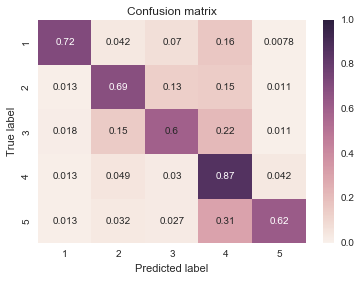

In [532]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(X=training, y=target)
rf_prediction = rf.predict(X=dataB)
# Your code goes here
print('Classification accuracy on the test set by using a Random Forest:', accuracy_score(classificationsB, rf.predict(X=dataB)))
plt.figure()
cm = confusion_matrix(classificationsB, rf_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
classes = ['1','2','3','4','5']
plot_confusion_matrix(cm_norm, classes=classes)

### ========== Question 2.13 ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier.

I would choose the Random Forest classifier because it had a higher accuracy rate on the test set. The GNB classifier seems to falter largely because of the correlations between words that we observed above. Correlations do not affect Decision Tree classifiers so we don't need to be concerned about that.